# TP1 - VP1
### Andrés Merli

# Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.

In [1]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Leemos las imagenes con OpenCV en escala de grises y visualizamos

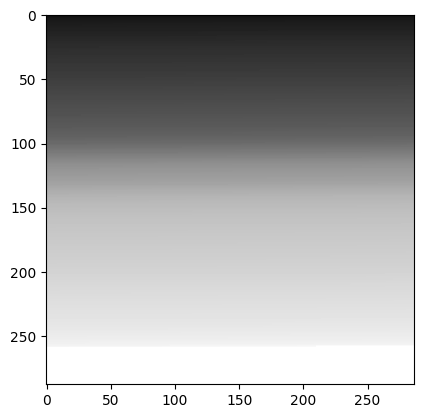

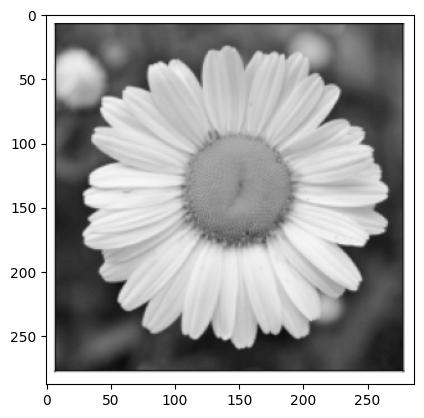

In [2]:
img1_gray = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_gray = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
plt.show()

Graficamos los Histogramas

In [3]:
hist1, bins1 = np.histogram(img1_gray.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(img2_gray.ravel(), 256, [0, 256])

(Text(0.5, 1.0, 'img2'), [<matplotlib.lines.Line2D at 0x2391bc507c0>])

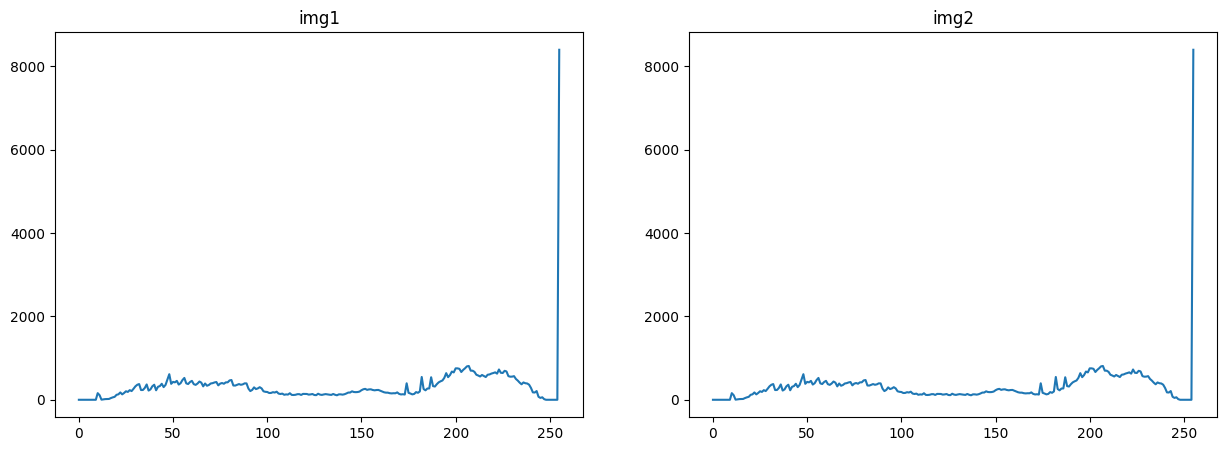

In [4]:
plt.subplots(figsize=(15, 5))
plt.subplot(121).set_title("img1"), plt.plot(hist1)
plt.subplot(122).set_title("img2"), plt.plot(hist2)

In [5]:
(hist1 == hist2).sum()

256

### Se observa que dos imágenes totalmente DISTINTAS presentan histogramas (1D) IDÉNTICOS, es decir con los mismos colores (grises) vemos 2 imagenes diferentes
### Si bien esto no es muy probable, podríamos concluir que quizás no resultaría muy útil considerar como feature a los histogramas de imagenes en escalas de grises para entrenar algun modelo.
### La ocurrencia de esto sería menos probable para imagenes a color, para lo que podríamos utilizar histogramas 2D

## Segmentación

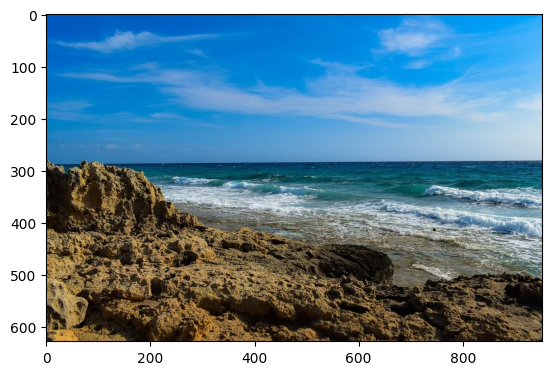

In [24]:
## Leemos la imagen segmentacion.png

img_color = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

In [63]:
imgRGB.shape

(628, 953, 3)

In [25]:
hist_r, bins_r = np.histogram(imgRGB[:,:,0].ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(imgRGB[:,:,1].ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(imgRGB[:,:,2].ravel(), 256, [0, 256])

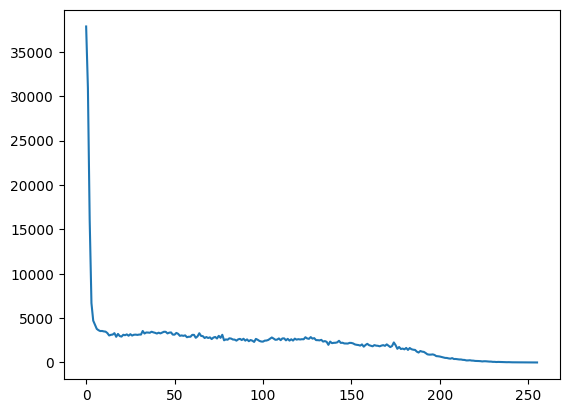

In [26]:
plt.plot(hist_r)

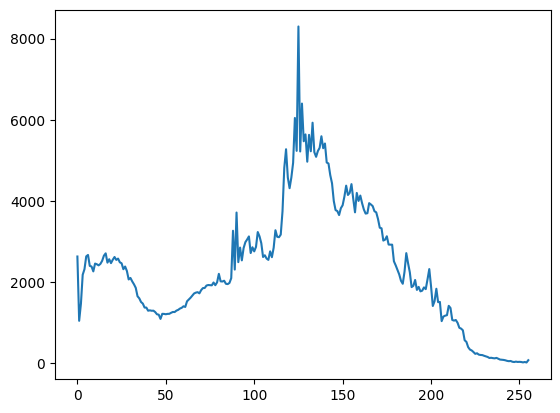

In [27]:
plt.plot(hist_g)

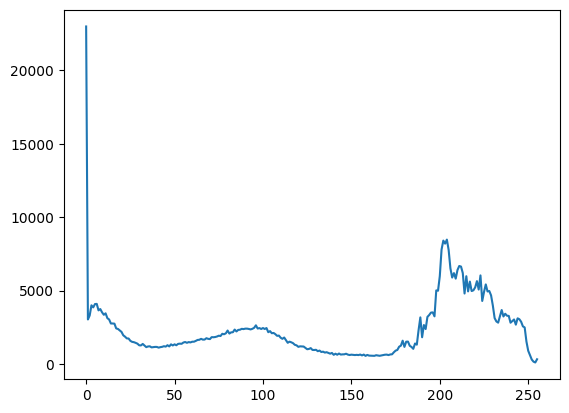

In [28]:
plt.plot(hist_b)

Se observan algunas posibles "clusters" para testear la segmentación en los canales, sobre todo en los canales g y b.
Vamos a ver la distribución de un perfil para ver si logramos caracterizar cada uno de los elementos de la imagen (agua, cielo y tierra) 

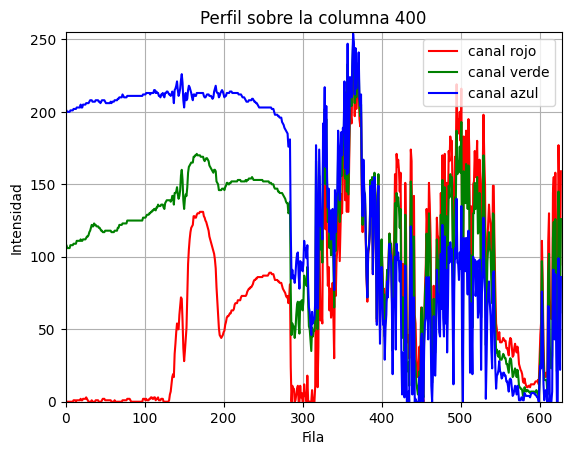

In [70]:
idx_col = 400
perfil_color = imgRGB[:,idx_col]
plt.plot(perfil_color[:,0], color='r', label='canal rojo')
plt.plot(perfil_color[:,1], color='g', label='canal verde')
plt.plot(perfil_color[:,2], color='b', label='canal azul')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title(f'Perfil sobre la columna {idx_col}')
plt.grid()
plt.xlim(0, 628)
plt.ylim(0, 255)
plt.legend()
plt.show()

En este perfil, el cielo parece tener de manera bastante regular valores entre 180 y 230 aproximadamente. Agua y Tierra no está tan clara la agrupación.

### Cielo

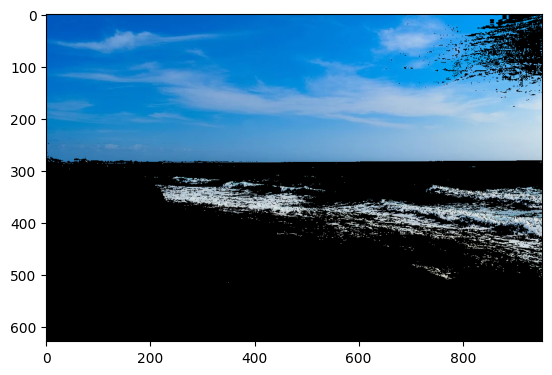

<function matplotlib.pyplot.show(close=None, block=None)>

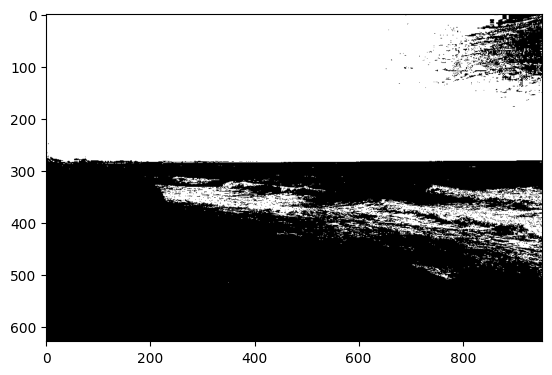

In [71]:
mask = cv.inRange(imgRGB[:,:,2], 175,  245)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

## Tierra

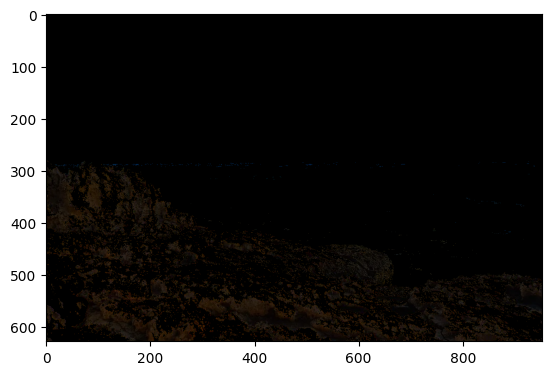

<function matplotlib.pyplot.show(close=None, block=None)>

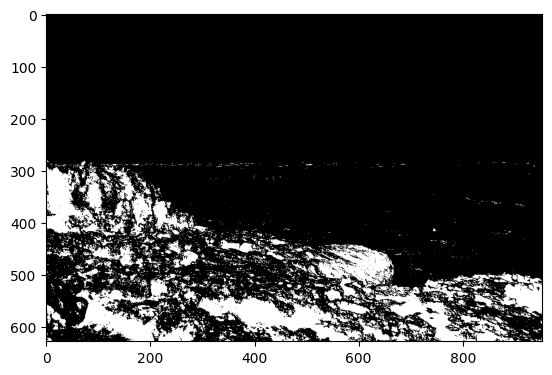

In [72]:
mask = cv.inRange(imgRGB[:,:,1], 0,  40)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

## Agua

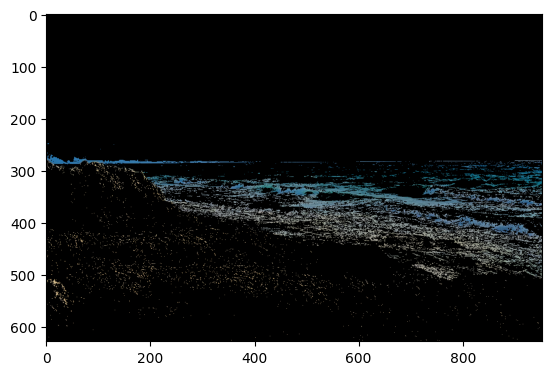

<function matplotlib.pyplot.show(close=None, block=None)>

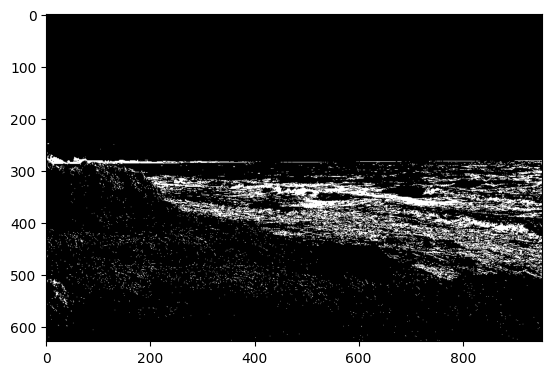

In [75]:
#n_sigma = 5
mask = cv.inRange(imgRGB[:,:,2], 120,  175)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

### Se podría realizar el mismo análisis para el espacio de color HSV para ver si logramos mejorar la segmentación